In [ ]:
# We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Load the dataset and explore the variables.
data_churn = pd.read_csv('customer_churn.csv')
display(data_churn.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data_churn.shape

(7043, 21)

In [6]:
data_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# 2. We will try to predict variable Churn using a logistic regression on variables tenure, 
# SeniorCitizen, MonthlyCharges.

# 3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

# new df
columns = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']
df_churn = data_churn[columns]


# X/y split
X = df_churn.drop('Churn', axis = 1)
y = df_churn['Churn']


In [11]:
# 4. Build the logistic regression model.
df_churn.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [15]:
df_churn.shape

(7043, 4)

In [19]:
df_churn.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn              object
dtype: object

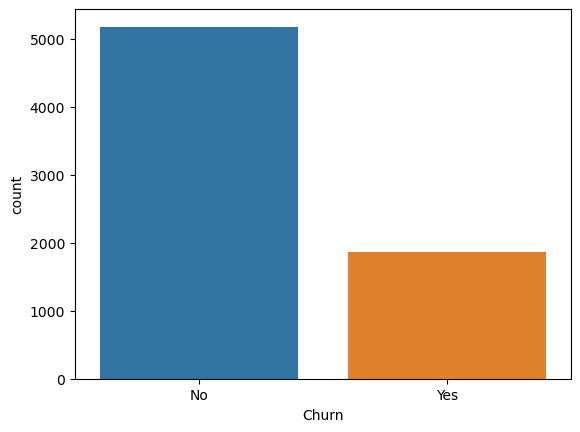

In [16]:
sns.countplot(x = 'Churn', data = df_churn); # imbalanced distribution 
plt.show()

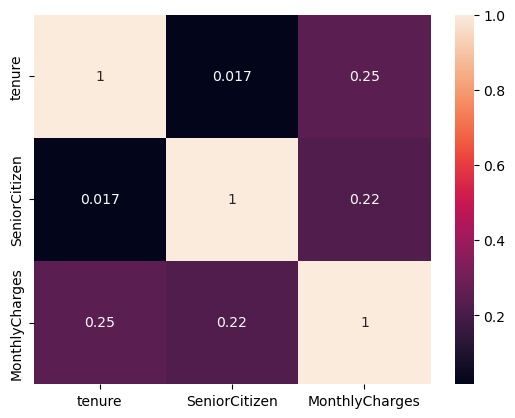

In [17]:
correlations_matrix = X.corr() # no correlation 
sns.heatmap(correlations_matrix, annot = True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 15) 

In [20]:
# all features are numeric.

transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns = X_train.columns, index = X_train.index)

X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns = X_test.columns, index = X_test.index) 

X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
4609,-0.294129,-0.441001,-0.313874
868,1.099261,-0.441001,0.698062
6838,-0.785913,-0.441001,1.145042
6348,-0.253147,-0.441001,0.149723
4041,0.566494,-0.441001,-0.126109


In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0, solver = 'lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [26]:
# 5. Evaluate the model.

print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.78


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_test_pred = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred, pos_label = 'Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred, pos_label = 'Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred, pos_label = 'Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))


The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.66
The recall in the TEST set is: 0.42
The F1 in the TEST set is: 0.51
The Kappa in the TEST set is: 0.38


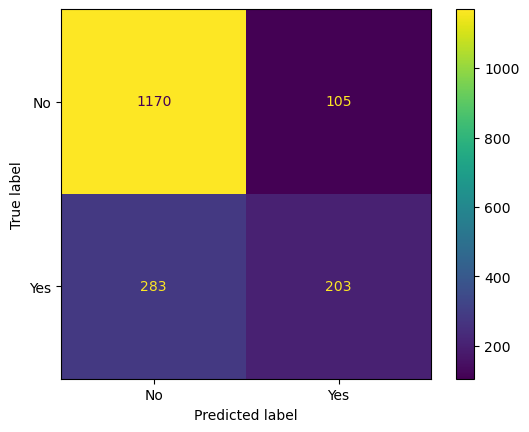

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = lr.classes_)
disp.plot()
plt.show()

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1275
         Yes       0.66      0.42      0.51       486

    accuracy                           0.78      1761
   macro avg       0.73      0.67      0.68      1761
weighted avg       0.76      0.78      0.76      1761



In [28]:
cohen_kappa_score(y_test, y_test_pred)

0.378201733071971

In [ ]:
# 6. Even a simple model will give us more than 70% accuracy. Why?

# Because due to the class imbalance which has muich higher counts of the "No" answer, 
# the model's prediction will act on this count with its predictions bending to it. 

In [ ]:
# 7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest 
# neighbors that adds new points between existing points. 
# Apply imblearn.over_sampling.SMOTE to the dataset. 
# Build and evaluate the logistic regression model. Is it there any improvement?

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 100, k_neighbors = 3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled, y_train)

In [30]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7798, 3)


In [31]:
y_train_SMOTE.value_counts()

Churn
No     3899
Yes    3899
Name: count, dtype: int64

In [33]:
lr2 = LogisticRegression(max_iter = 1000)
lr2.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr2.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label = 'Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label = 'Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label = 'Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.73
The precision in the TEST set is: 0.50
The recall in the TEST set is: 0.69
The F1 in the TEST set is: 0.58
The Kappa in the TEST set is: 0.39


In [40]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.86      0.74      0.80      1275
         Yes       0.50      0.69      0.58       486

    accuracy                           0.73      1761
   macro avg       0.68      0.72      0.69      1761
weighted avg       0.76      0.73      0.74      1761



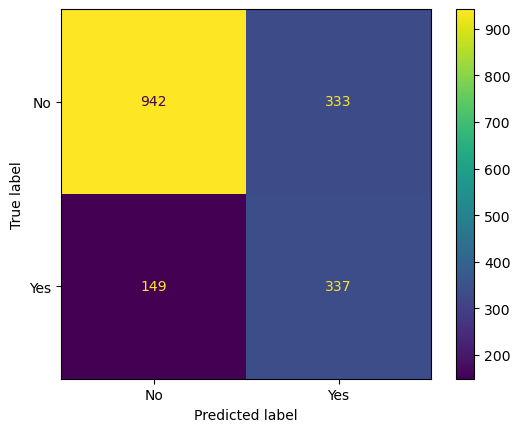

In [35]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
# Findings: 
# accuracy & precision decreased
# recall increased 
# F1 increased
# Kappa increased just by 0.01 

# it decreased the false negatives and the true negatives
# increased the true positives and the false positives
# so in the end it is going to really depend on the business case and what is more important to be predictable by the model. 